#### Preparing our dataset

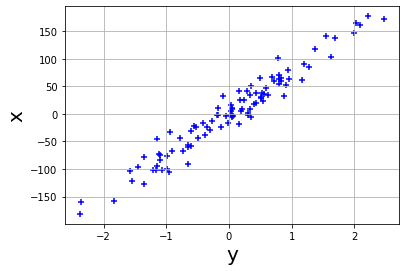

In [22]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.scatter(X[:,0], y, color='b', marker='+', s=30)
plt.ylabel('x', size=20)
plt.xlabel('y', size=20)
plt.grid()

#### Implementing the Linear Regression logic

In [23]:
class LinearRegression:
  '''Implementing the Linear regression algorithm.'''
  def __init__(self, lr=0.01, n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    '''training the dataset'''
    # initializing the weights and bias
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias
      dw = (2/n_samples)* np.dot(X.T, (y - y_pred))
      db = (2/n_samples)* np.sum(y - y_pred)

      self.weights += self.lr * dw
      self.bias += self.lr * db

  def predict(self, X):
    '''predicting for the dataset'''
    return np.dot(X, self.weights) + self.bias


#### Testing the Linear Regressor

361.2812896055198


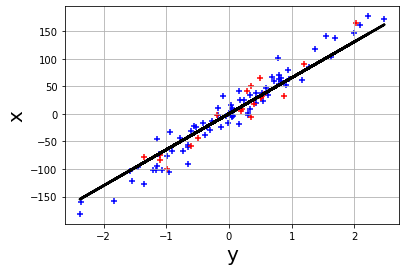

In [33]:
regressor = LinearRegression(lr=0.001)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

def mse(y_pred, y_true):
  return np.mean((y_pred - y_true)**2)

print(mse(y_pred, y_test))
plt.scatter(X_train, y_train, color='b', marker='+', s=30)
plt.scatter(X_test, y_test, color='r', marker='+', s=30)
plt.plot(X, regressor.predict(X), color='k', linewidth=2.5)
plt.ylabel('x', size=20)
plt.xlabel('y', size=20)
plt.grid()

###### Credits: https://www.youtube.com/watch?v=ltXSoduiVwY